# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [240]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
#!kaggle datasets download -d khaledzsa/traffic-dataset
#!unzip traffic-dataset.zip

In [2]:
import pandas as pd

df = pd.read_csv('/content/Traffic Data.csv', parse_dates=['date_time'], index_col=['date_time'])

In [3]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [4]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

<Axes: xlabel='date_time'>

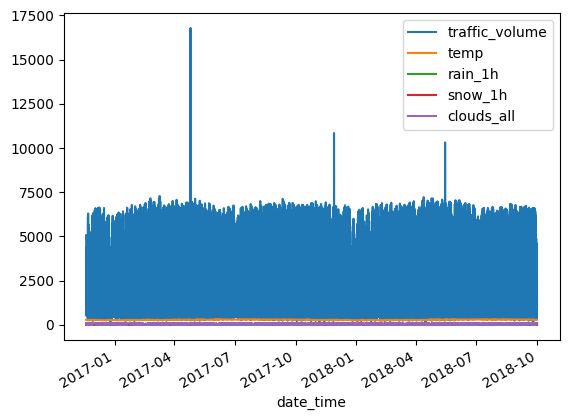

In [244]:
df.plot()

<Axes: >

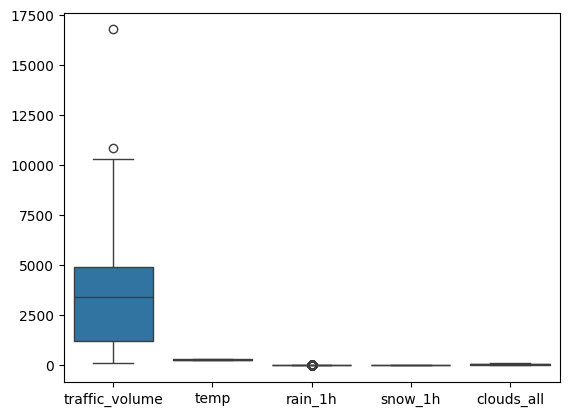

In [245]:
import seaborn as sns

sns.boxplot(df)

-> there is outliers in traffic_volume

Text(0, 0.5, 'kelvin')

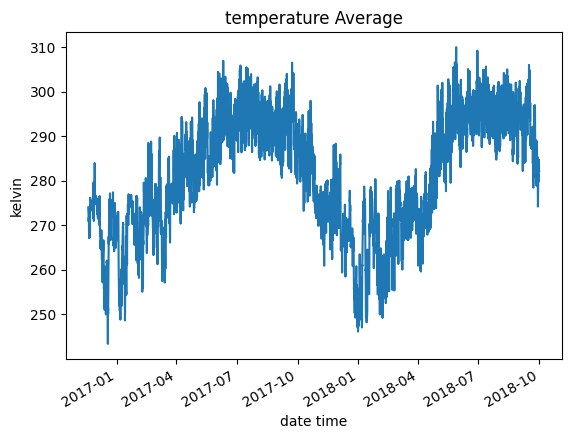

In [246]:
import matplotlib.pyplot as plt

df['temp'].plot()
plt.title('temperature Average')
plt.xlabel('date time')
plt.ylabel('kelvin')

Text(0, 0.5, 'mm')

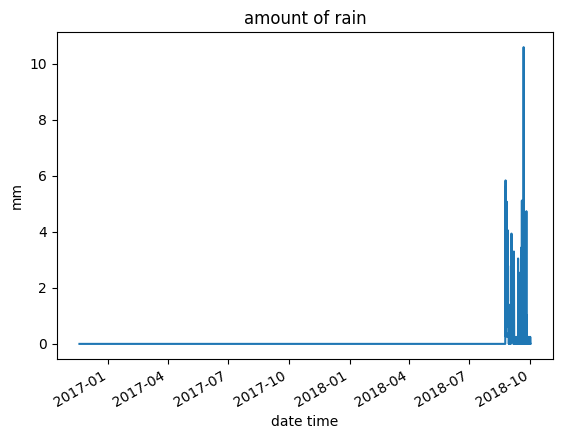

In [6]:
import matplotlib.pyplot as plt

df['rain_1h'].plot()
plt.title('amount of rain')
plt.xlabel('date time')
plt.ylabel('mm')

<Axes: xlabel='weather_main', ylabel='count'>

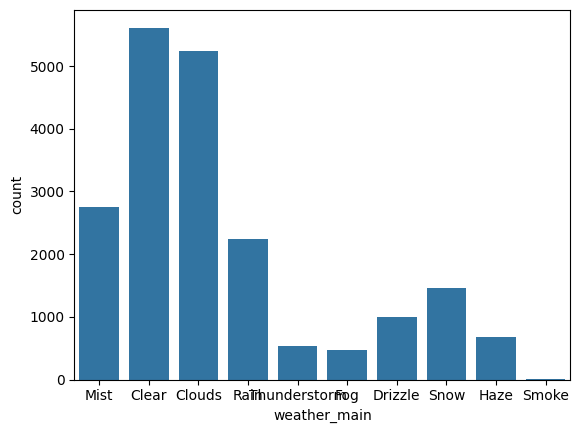

In [248]:
sns.countplot(df, x='weather_main')

Text(0, 0.5, 'percentage')

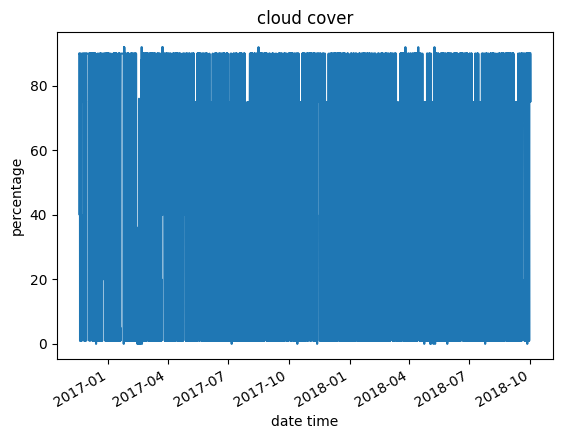

In [249]:
df['clouds_all'].plot()
plt.title('cloud cover')
plt.xlabel('date time')
plt.ylabel('percentage')

Text(0.5, 0, 'date time')

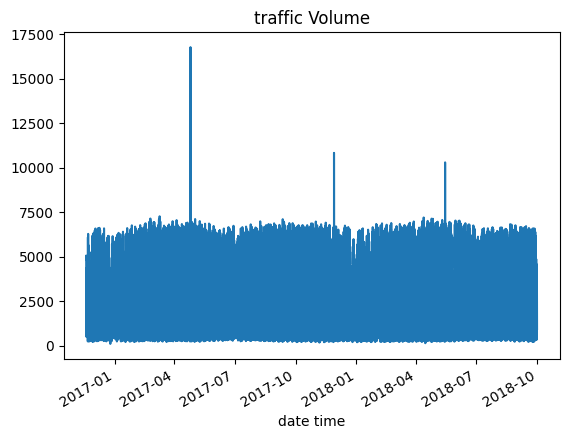

In [7]:
df['traffic_volume'].plot()
plt.title('traffic Volume')
plt.xlabel('date time')

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [250]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [252]:
df.dropna(axis=0,inplace=True)

In [253]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19980 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 19980 non-null  float64
 2   rain_1h              19980 non-null  float64
 3   snow_1h              19980 non-null  float64
 4   clouds_all           19980 non-null  int64  
 5   weather_main         19980 non-null  object 
 6   weather_description  19980 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [255]:
df.sort_index(inplace=True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [256]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

In [257]:
df[['traffic_volume', 'prev_traffic_volume']]

,traffic_volume,prev_traffic_volume
date_time,,
2016-11-18 15:00:00,4872.0,NaN
2016-11-18 15:00:00,4872.0,4872.0
2016-11-18 15:00:00,4872.0,4872.0
2016-11-18 16:00:00,5074.0,4872.0
2016-11-18 16:00:00,5074.0,5074.0
...,...,...
2018-09-30 19:00:00,3543.0,3947.0
2018-09-30 20:00:00,2781.0,3543.0
2018-09-30 21:00:00,2159.0,2781.0


In [258]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()

In [259]:
df[['traffic_volume', 'traffic_volume_diff']]

,traffic_volume,traffic_volume_diff
date_time,,
2016-11-18 15:00:00,4872.0,NaN
2016-11-18 15:00:00,4872.0,0.0
2016-11-18 15:00:00,4872.0,0.0
2016-11-18 16:00:00,5074.0,202.0
2016-11-18 16:00:00,5074.0,0.0
...,...,...
2018-09-30 19:00:00,3543.0,-404.0
2018-09-30 20:00:00,2781.0,-762.0
2018-09-30 21:00:00,2159.0,-622.0


In [260]:
#Day of the week: To capture weekly seasonality.

df['Day_of_the_week'] = df.index.dayofweek

#Month: To capture monthly trends.

df['Month'] = df.index.month

#Day of the year: Useful for modeling yearly seasonality.
df['Day_of_the_year'] =df.index.dayofyear

In [261]:
df[['Day_of_the_week', 'Month', 'Day_of_the_year']]

,Day_of_the_week,Month,Day_of_the_year
date_time,,,
2016-11-18 15:00:00,4,11,323
2016-11-18 15:00:00,4,11,323
2016-11-18 15:00:00,4,11,323
2016-11-18 16:00:00,4,11,323
2016-11-18 16:00:00,4,11,323
...,...,...,...
2018-09-30 19:00:00,6,9,273
2018-09-30 20:00:00,6,9,273
2018-09-30 21:00:00,6,9,273


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [262]:
target = df['traffic_volume'].values.reshape(-1,1)

In [263]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
target_pre =scaler.fit_transform(target)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [264]:
train_size = int(len(target_pre)* 0.8)
train, test = target_pre[:train_size], target_pre[train_size:]

In [265]:
X_train, y_train = train[:-1], train[1:]
X_test, y_test = test[:-1], test[1:]

X_train = X_train.reshape(-1, 1, 1)
X_test = X_test.reshape(-1, 1, 1)

In [266]:
X_train.shape, X_test.shape

((15983, 1, 1), (3995, 1, 1))

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [267]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN , Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [268]:

#build RNN

model = Sequential([
    SimpleRNN(16, activation= 'tanh', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(32, activation= 'tanh'),
    Dense(1)
])

#compile
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

#fit
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=1024)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.8023 - mae: 0.8023 - val_loss: 0.5467 - val_mae: 0.5467
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4737 - mae: 0.4737 - val_loss: 0.2776 - val_mae: 0.2776
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3193 - mae: 0.3193 - val_loss: 0.2654 - val_mae: 0.2654
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3210 - mae: 0.3210 - val_loss: 0.2591 - val_mae: 0.2591
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3062 - mae: 0.3062 - val_loss: 0.2671 - val_mae: 0.2671
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3053 - mae: 0.3053 - val_loss: 0.2586 - val_mae: 0.2586
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2962 - mae: 0.2962 - val_loss: 0.2582 - val_mae: 0.2582
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2908 - mae: 0.2908 - val_loss: 0.2592 - val_mae: 0.2592
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2938 - mae

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [269]:
# predict
train_pred = scaler.inverse_transform(model.predict(X_train))
test_pred = scaler.inverse_transform(model.predict(X_test))



500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [270]:
#because i make scaler before i spilt that mean the scaler apply in X and Y
y_test = scaler.inverse_transform(y_test)

In [271]:

mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, test_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

MAE: 462.43919795374103
MSE: 524247.31492835336
RMSE: 724.0492489660861
MAPE: 0.2114900388645334


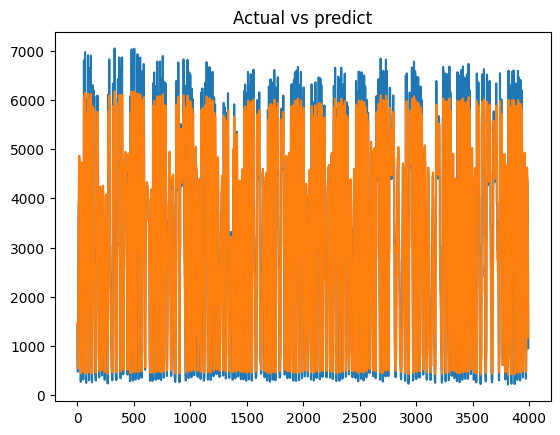

In [272]:
plt.title('Actual vs predict')
plt.plot(y_test)
plt.plot(test_pred)
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [277]:

#build LSTM

model = Sequential([
    LSTM(128, activation='tanh',return_sequences=True),
    LSTM(512, activation='tanh',return_sequences=True),
    LSTM(256, activation='tanh'),
    Dense(1)
])

#compile
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

#fit
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=1024)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.8585 - mae: 0.8585 - val_loss: 0.7223 - val_mae: 0.7223
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.5637 - mae: 0.5637 - val_loss: 0.3657 - val_mae: 0.3657
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3129 - mae: 0.3129 - val_loss: 0.2960 - val_mae: 0.2960
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2641 - mae: 0.2641 - val_loss: 0.2590 - val_mae: 0.2590
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2483 - mae: 0.2483 - val_loss: 0.2574 - val_mae: 0.2574
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2441 - mae: 0.2441 - val_loss: 0.2571 - val_mae: 0.2571
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2414 - mae: 0.2414 - val_loss: 0.2576 - val_mae: 0.2576
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2429 - mae: 0.2429 - val_loss: 0.2571 - val_mae: 0.2571
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.242

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [278]:
# predict
train_pred = scaler.inverse_transform(model.predict(X_train))
test_pred = scaler.inverse_transform(model.predict(X_test))

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [279]:
mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, test_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

MAE: 460.55468979168296
MSE: 509754.8438019277
RMSE: 713.9711785512968
MAPE: 0.20138758946413196


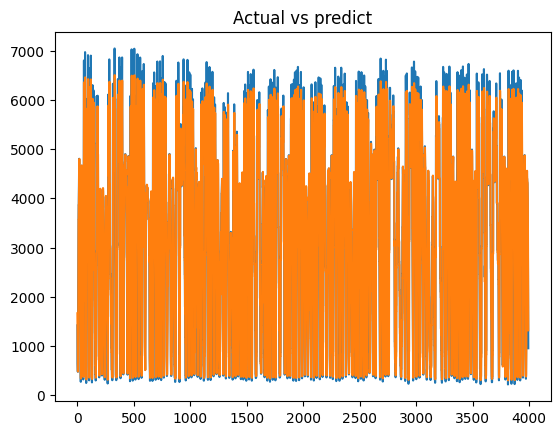

In [280]:
plt.title('Actual vs predict')
plt.plot(y_test)
plt.plot(test_pred)
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1- null values may casue error for your model. In my casue null value was a small its around 20 in 20000 So, I drop them. and I use standerscaler because i have a small mount of outliers. I can remove the outliers then use MinMax but i don't have enough time to do it.

2- the feature that i made it will help model to captuer trend and seasonality.

3- I'm allways try to build my model simple then i see if it working well or not. then see if need to add more complixety or not.
that why i start with RNN and LSTM with small number of neurons then i try to change the number of layers and neurons to get a good result.

4- i change the number of epoch but nothing change (it was in the 1st run epoch=50, in the 2ed run epoch=10), when i change the batch size the model being faster than defult number.

5- i choose MAE as a loss function bucause MSE will ganna make the number more bigger than i thought.


7- in the first try the model gave me underfitting i try many ways to prevent it but no one work, they reduce it but not prevent it. Then i realized there are a scaler on Y so i remove it but still the model didn't predict well.

that was i always use 'relu'. in my cause, after scaling i have a negitve number So, if i use the (activation='relu') which contain only positive value, i didn't gave me a good predict, after remove 'relu' i find a fit model.

8- in the future I will try advance model (like: ARIMA, SARIMA) and try different activation function.



- Nuha Aloqayli - Group 6